# 🛠️ Exercise - Model Training


 In Colab, be sure to select 'T4 GPU' under 'Edit'->'Notebook Settings'->'Hardware accelerator' section. Or under Connect > Change runtime

 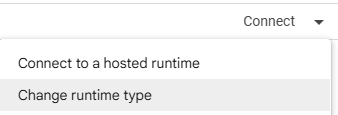

 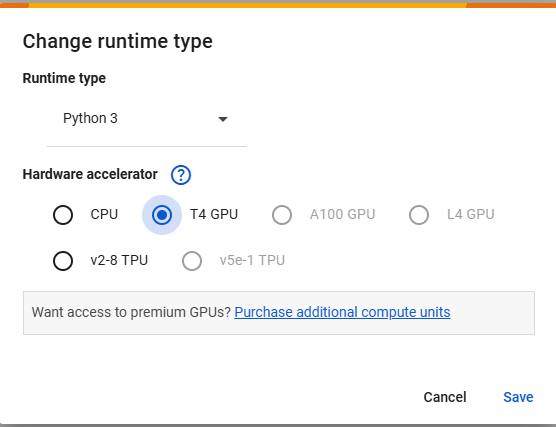

## Workshop Sample Dataset
- https://storage.googleapis.com/nmfs_odp_pifsc/PIFSC/ESD/ARP/pifsc-ai-data-repository/fish-detection/workshop/fish_dataset.zip

In [ ]:
# Install Ultralytics YOLO
!pip install ultralytics

In [2]:
# Setup Paths
# Google Cloud Storage URLs
dataset_url = "https://storage.googleapis.com/nmfs_odp_pifsc/PIFSC/ESD/ARP/pifsc-ai-data-repository/fish-detection/workshop/fish_dataset.zip"

# Local paths for dataset & model
dataset_zip_path = "/content/fish_dataset.zip"
dataset_extract_path = "/content/fish_dataset/"

In [3]:
# Download Training Dataset
import os
import requests
import zipfile
from tqdm import tqdm
def download_file(url, output_path):
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get("content-length", 0))

    with open(output_path, "wb") as file, tqdm(
        desc=f"Downloading {os.path.basename(output_path)}",
        total=total_size,
        unit="B",
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in response.iter_content(chunk_size=1024):
            file.write(data)
            bar.update(len(data))

# Download dataset if it doesn't exist
if not os.path.exists(dataset_zip_path):
    download_file(dataset_url, dataset_zip_path)
else:
    print("✔ Dataset already downloaded.")

# Extract dataset
if not os.path.exists(dataset_extract_path):
    with zipfile.ZipFile(dataset_zip_path, "r") as zip_ref:
        zip_ref.extractall(dataset_extract_path)
    print(f"✔ Extracted dataset to {dataset_extract_path}")
else:
    print("✔ Dataset already extracted.")

✔ Extracted dataset to /content/fish_dataset/


# Simple Training Script

In [4]:
import os
import torch
from ultralytics import YOLO

# Determine the device to use
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Set paths
base_path = "/content/fish_dataset/"
yaml_file_path = os.path.join(base_path, 'dataset.yaml')

# Load the smaller YOLO11 model
small_model = YOLO("yolo11n.pt")

# Move the model to the correct device
small_model.model.to(device)

# Training hyperparameters
small_model.train(
    data=yaml_file_path,
    epochs=5,
    imgsz=640,
    batch=16,
    device=device,
    project='training_logs',  #logging directory
)

print("Training complete!")

# Save the trained model
trained_model_path = os.path.join(base_path, "yolo11n_fish_trained_v1.pt")
small_model.save(trained_model_path)
print(f"Trained model saved to {trained_model_path}")

# Save the model weights separately for further use
weights_path = os.path.join(base_path, "yolo11n_fish_weights_v1.pth")
torch.save(small_model.model.state_dict(), weights_path)
print(f"Weights saved to {weights_path}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Using device: cuda


100%|██████████| 5.35M/5.35M [00:00<00:00, 313MB/s]


Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/fish_dataset/dataset.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=training_logs, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 121MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/fish_dataset/labels/train... 786 images, 77 backgrounds, 1 corrupt: 100%|██████████| 786/786 [00:00<00:00, 2446.68it/s]

train: WARNING ⚠️ /content/fish_dataset/images/train/20161014.193730.503.011459.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1097]
train: New cache created: /content/fish_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/fish_dataset/labels/val... 196 images, 19 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<00:00, 1378.59it/s]

val: New cache created: /content/fish_dataset/labels/val.cache


Plotting labels to training_logs/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to training_logs/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.34G      1.409      2.513      1.331          0        640: 100%|██████████| 50/50 [00:17<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        196        457      0.953      0.267      0.649      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.24G      1.399      1.561       1.33          3        640: 100%|██████████| 50/50 [00:17<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]

                   all        196        457       0.72      0.468      0.556      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.25G      1.408      1.392      1.319          9        640: 100%|██████████| 50/50 [00:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        196        457      0.821      0.681      0.758       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.24G      1.352      1.289      1.294          1        640: 100%|██████████| 50/50 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        196        457      0.854      0.796      0.877      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.23G      1.236      1.132       1.23         10        640: 100%|██████████| 50/50 [00:14<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]

                   all        196        457      0.891      0.844      0.927        0.6



5 epochs completed in 0.028 hours.
Optimizer stripped from training_logs/train/weights/last.pt, 5.5MB
Optimizer stripped from training_logs/train/weights/best.pt, 5.5MB

Validating training_logs/train/weights/best.pt...
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


                   all        196        457      0.891      0.844      0.927      0.601
Speed: 0.4ms preprocess, 2.8ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to training_logs/train
Training complete!
Trained model saved to /content/fish_dataset/yolo11n_fish_trained_v1.pt
Weights saved to /content/fish_dataset/yolo11n_fish_weights_v1.pth


# View Training Logs

✅ Found 21 images.
⚠️ Skipping: /content/training_logs/train/results.csv (cannot identify image file '/content/training_logs/train/results.csv')
⚠️ Skipping: /content/training_logs/train/events.out.tfevents.1741117959.cc3d29d77482.1852.0 (cannot identify image file '/content/training_logs/train/events.out.tfevents.1741117959.cc3d29d77482.1852.0')
⚠️ Skipping: /content/training_logs/train/args.yaml (cannot identify image file '/content/training_logs/train/args.yaml')


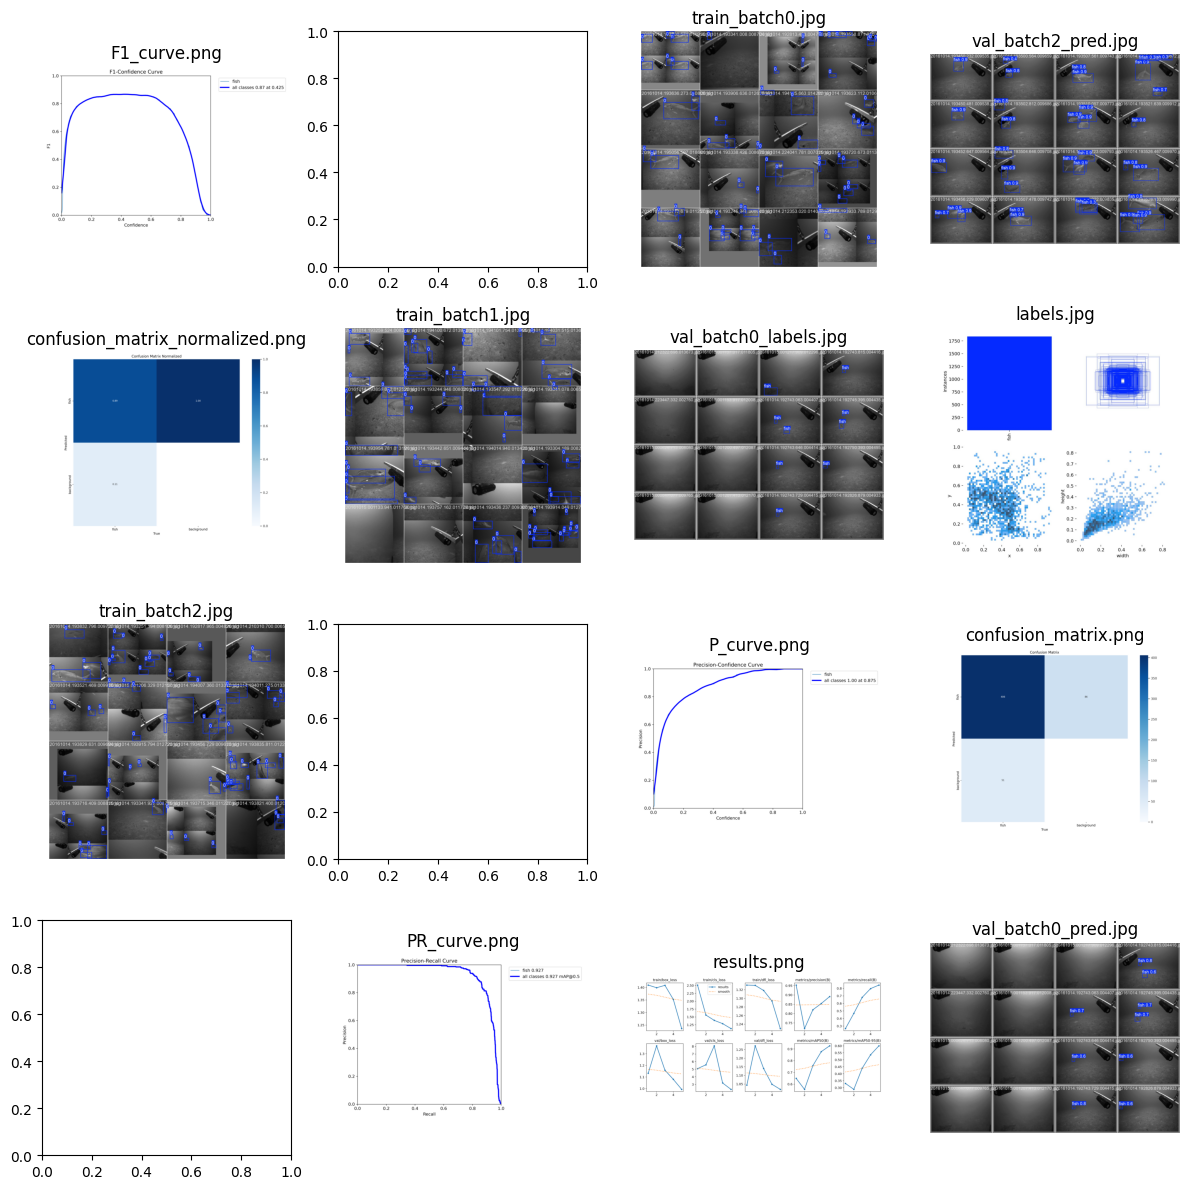

In [15]:
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image  # Use PIL for better handling of images

# Path to training images
image_folder = "/content/training_logs/train"

# Get all image file paths (adjust extensions if needed)
image_paths = glob(os.path.join(image_folder, "*.*"))  # Matches all image types

# Check if images exist
if not image_paths:
    print("❌ No images found! Check the folder path and try again.")
else:
    print(f"✅ Found {len(image_paths)} images.")

# Limit number of images displayed (max 16 for readability)
num_images = min(16, len(image_paths))
cols = 4  # Number of columns in the grid
rows = (num_images // cols) + (num_images % cols > 0)

# Create a plot grid
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# Display images
for ax, img_path in zip(axes.ravel(), image_paths[:num_images]):
    try:
        img = Image.open(img_path)  # Open image with PIL
        ax.imshow(img)
        ax.set_title(os.path.basename(img_path))
        ax.axis("off")
    except Exception as e:
        print(f"⚠️ Skipping: {img_path} ({e})")

plt.tight_layout()
plt.show()


# Download Model and Logs

In [12]:
import shutil

# Zip the training logs directory
shutil.make_archive("/content/training_logs", 'zip', "/content/training_logs")

# Zip the trained model
shutil.make_archive("/content/trained_model", 'zip', "/content/fish_dataset/")

from google.colab import files

# Download the zipped logs
files.download("/content/training_logs.zip")

# Download the zipped model
files.download("/content/trained_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Print Metrics

In [5]:
# Evaluate model performance
metrics = small_model.val(data=yaml_file_path, device=device)
print(metrics)

Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/fish_dataset/labels/val.cache... 196 images, 19 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]


                   all        196        457      0.891      0.844      0.927      0.601
Speed: 2.3ms preprocess, 5.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to training_logs/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd6474960d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0

## Optimize & Export Model to Different Formats

In [ ]:


# Export the trained model to ONNX format
try:
    small_model.export(format="onnx")
    print("ONNX model exported successfully!")
except Exception as e:
    print(f"ONNX export failed: {e}")

# Export to TensorFlow Lite
try:
    small_model.export(format="tflite")
    print("TFLite model exported successfully!")
except Exception as e:
    print(f"TFLite export failed: {e}")

# Export to TensorFlow Edge TPU
try:
    small_model.export(format="edgetpu")
    print("Edge TPU model exported successfully!")
except Exception as e:
    print(f"Edge TPU export failed: {e}")

# Export to NCNN format
try:
    small_model.export(format="ncnn")  # Creates .param and .bin files
    print("NCNN files exported successfully!")
except Exception as e:
    print(f"NCNN export failed: {e}")

print("Model exports completed where possible.")


# Advanced Example
## Important Note:Some hyperparameters are already on by default and must be turned off like optomizer & some data augmentations

In [ ]:
import os
import torch
from ultralytics import YOLO

# Determine the device to use
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Set paths
base_path = "/content/fish_dataset/"
yaml_file_path = os.path.join(base_path, 'dataset.yaml')

# Load the smaller YOLO11 model
small_model = YOLO("yolo11n.pt")

# Move the model to the correct device
small_model.model.to(device)

# Training hyperparameters
small_model.train(
    data=yaml_file_path,
    epochs=2,
    imgsz=640,
    batch=32,  # Adjust batch size based on GPU capacity
    lr0=0.001,  # Initial learning rate
    lrf=0.0001,  # Final learning rate (used for Cosine Annealing)
    optimizer='AdamW',  # Use AdamW optimizer for better performance
    device=device,
    save_period=10,  # Save model checkpoint every 10 epochs
    patience=10,  # Early stopping if no improvement after 10 epochs
    augment=True,  # Enable data augmentation
    mosaic=True,  # Use mosaic augmentation
    mixup=True,   # Use MixUp augmentation
    cos_lr=True,  # Cosine annealing learning rate
    project='training_logs',  # TensorBoard logging directory
)

print("Training complete!")

# Save the trained model
trained_model_path = os.path.join(base_path, "yolo11n_fish_trained_v1.pt")
small_model.save(trained_model_path)
print(f"Trained model saved to {trained_model_path}")

# Save the model weights separately for further use
weights_path = os.path.join(base_path, "yolo11n_fish_weights_v1.pth")
torch.save(small_model.model.state_dict(), weights_path)
print(f"Weights saved to {weights_path}")